----
# Eigenvalue plot for LDA dimensionality reduction for 11 dimension

----

In [1]:
%load_ext autoreload
%autoreload 2

from sklearn.metrics import confusion_matrix as skconfmatrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Set correct working directory
if os.getcwd() != os.path.abspath("../Python"):
    os.chdir("../../Python")

# Import files from /Python directory
from confusion_matrix import confusion_matrix

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cmr"
})

In [2]:

# Load data sets
train_data = pd.read_csv("../TrainingData/neodata/soltani_14d_nonoise_1200.csv")
test_data = pd.read_csv("../TestData/neodata/soltani_14d_nonoise_100.csv")
vald_data=pd.read_csv("../ValidationData/neodata/soltani_14d_nonoise_1200.csv")

## Standardize data (z-norm)

In [3]:
#standardization
import standardization as sd
standardizer = sd.standardization(train_data,'target')

trn = standardizer.transform(train_data)        #The function makes sure the target is not a part of the transformation
vald = standardizer.transform(vald_data)
tst = standardizer.transform(test_data)

## LDA dimensionality reduction

Preserving 99.28% of variance


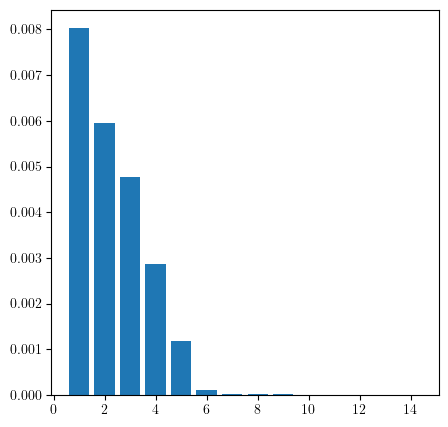

In [4]:
from lda import LDA_reducer as reducer
lda = reducer(trn,5,'target')



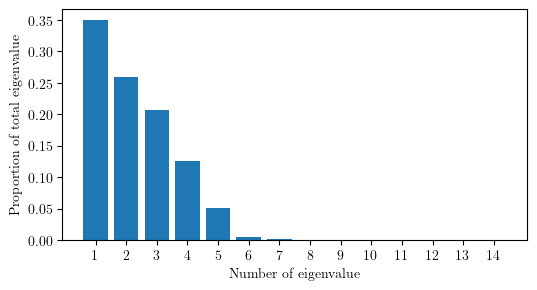

In [16]:
#Saves the eigenvalue plot
lim = 14
fig,axs = plt.subplots(figsize=(6,3))
axs.bar([x for x in range(1,lim+1)],lda.eig_val[0:lim]/sum(lda.eig_val[0:lim]))
axs.set_xticks([x for x in range(1,lim+1)])
axs.set_ylabel("Proportion of total eigenvalue")
axs.set_xlabel("Number of eigenvalue")
fig.savefig("LDA_5d_eigvalue.pdf", format="pdf", bbox_inches="tight")

In [10]:
sum(lda.eig_val[0:5])/sum(lda.eig_val[0:lim])

0.9928348334124407